# BUS 32100 Midterm 

Rules for the midterm: 
* No discussion or collaboration with other students, please
* You can use Google, but if you use code from any other source, be sure to cite it (at minimum, include the URL of the source)
* TAs will institute a waiting room for office hours so they can speak to only one student at a time
* TAs will NOT help with questions about how to approach the problem. They'll be instructed to answer only very specific Python sytanx questions
* You may Slack questions to the TAs or instructor at any time
* **REMEMBER: Doing only the minimum of what's required will get you a grade of approx B/B+, depending on what others do. The midterm and final are graded on a curve, by necessity (Booth rules about having a maximum GPA for each course every quarter).**

## Instructions

This is an **open-ended** data analytics exercise! You must first choose one of the following datasets (listed in order of perceived difficulty). All datasets are on Canvas, the links below are just if you'd like more information. You can use either regression or classification for most of them (even if the link says it's for classification, you may be able to use a different column to do a regression; be creative!): 

1. [Red wine quality](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) OR
2. [Diabetes](https://www.kaggle.com/uciml/pima-indians-diabetes-database) OR
3. [Cancer incidence](https://data.world/nrippner/ols-regression-challenge#) OR
4. [Simulated electrical grid stability](https://archive.ics.uci.edu/ml/datasets/Electrical+Grid+Stability+Simulated+Data+) OR
5. [A synthetic (fake) dataset from a Human Resources department](https://www.kaggle.com/rhuebner/human-resources-data-set) OR
6. new for the Fall 2022 midterm, [Olympic athletes and results](https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results)

Some notes about them to help you decide: 
* You can do regression and classification with most of them, but one approach may be easier for each dataset
* The electrical grid stability dataset has features that are harder to interpret and you may not know what each one _really_ is. On the one hand, it may make the exercise harder; on the other hand, the exercise will be harder ;)
* The HR dataset has a lot of categorical variables
* Using the "hardest" dataset will not automatically get you a higher grade; a high quality analysis using red wine quality is better than a mediocre analysis of the HR dataset
* I haven't explored the Olympics dataset at all yet, so I can't confirm whether it has errors or would be good for the exam, but you're welcome to try it

## Required output

Once you choose a dataset, all that we're asking is that you do at least these five things: 

1. Do some preliminary EDA to understand your data and **write a few sentences** about what you see (hint: `describe`, `columns`, `info`, `value_counts`). You can do a train/test split, but it's not required
2. Feature engineer at least one new variable/column using the data -- be creative! This new feature does not have to be used in the model, but it should be somehow useful. Can you report a metric from it? And/or use it in the model.
3. Create one table with some type of summary statistic (hint: `groupby`?)
4. One chart or graph of any kind (hint: plot directly in `Pandas` with, e.g., `.plot` or use `Seaborn`, where we've seen heatmaps and pair plots). This can be a bar chart, a heatmap, a line chart, anything you can think of!)
5. Run one model: it can be regression or classification, up to you! If you do both, you'll impress us. For the model, outputting the coefficients alone is sufficient, but think about what else you can do (hint: performance metrics? R-squared and RMSE, e.g.). You can do a train/test split, but it's not required

## 0. Import the data

In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('/Users/douglasmacintosh/Downloads/winequality-red.csv', sep=";")

In [5]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
df2 = pd.read_csv('/Users/douglasmacintosh/Downloads/electrical_grid_stability.csv')

In [7]:
df2.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [2]:
df3 = pd.read_csv('/Users/douglasmacintosh/Downloads/HRDataset_v14.csv')

In [3]:
df3.head(5)

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [8]:
df4 = pd.read_csv('/Users/douglasmacintosh/Downloads/diabetes.csv')

In [9]:
df4.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
df5 = pd.read_csv('/Users/douglasmacintosh/Downloads/cancer_data.csv')

In [12]:
df5.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


## 1. Preliminary EDA

Remember, you can do a train/test split, but it's not required.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
df3 = pd.read_csv('/Users/douglasmacintosh/Downloads/HRDataset_v14.csv')

In [3]:
df3

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [4]:
df3.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


***


I chose the HR dataset because it seemed the most interesting out of all of the datasets. There was a lot of information that could be gained from this data. After reviewing it, there's a fair amount of categorical variable columns, but we are fortunate that many of those have ID columns, which could potentially allow us to remove the categorical variable columns once we understand exactly what ID corresponds to which status. 


***

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

***

The biggest information we can gather from this is the data types and the non-null values in each column. We can see that of our 311 employees on this list, 104 have been terminated and 8 do not have a manager or some other circumstance. It will be interesting to dig into those columns to understand more. When we get into feature engineering, we can create some columns to pull some insights from that information. 


***

In [6]:
df3.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

***
Now I'll run through each of the ID columns and determine whether I have enough information from the ID column itself to remove the categorical columns to prep the data for our regression later and determine if the information in the ID column is actually correct. 
***

In [7]:
df3['MarriedID'].value_counts()

0    187
1    124
Name: MarriedID, dtype: int64

In [8]:
df3['MaritalStatusID'].value_counts()

0    137
1    124
2     30
3     12
4      8
Name: MaritalStatusID, dtype: int64

In [9]:
df3['MaritalDesc'].value_counts()

Single       137
Married      124
Divorced      30
Separated     12
Widowed        8
Name: MaritalDesc, dtype: int64

*****
We can see that MaritalStatusID and MaritalDesc are 1 to 1 fits. MaritalDesc column will be removed for the regression and plotting since it's unnecessary. 
****

In [10]:
df3['GenderID'].value_counts()

0    176
1    135
Name: GenderID, dtype: int64

In [11]:
df3['Sex'].value_counts()

F     176
M     135
Name: Sex, dtype: int64

***


Same reasoning as MaritalStatusID. Removing the Sex column.


***

In [12]:
df3['EmpStatusID'].value_counts()

1    184
5     88
3     14
4     14
2     11
Name: EmpStatusID, dtype: int64

In [13]:
df3['EmploymentStatus'].value_counts()

Active                    207
Voluntarily Terminated     88
Terminated for Cause       16
Name: EmploymentStatus, dtype: int64

*****

This column isn't as simple as the previous two. We need to dig into the data a little bit more to understand why there are 5 EmpStatusID versus the 3 in EmploymentStatus.
****

In [14]:
df3['DeptID'].value_counts()

5    208
3     50
6     32
1     10
4     10
2      1
Name: DeptID, dtype: int64

In [15]:
df3['Department'].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

******

Similar to the EmploymentStatus columns, there is some more research required to understand this. We can see that there isn't a 1 to 1 to DeptID to Department so there's some misclassification occurring. We have to figure out the errors and correct. It appears that the errors may be contained within the Production, Sales, Software Engineering, and Admin Offices portions. We can examine the various roles within each and see where there's an error. 

******

In [5]:
mask = ((df3.Department == 'Production') & (df3.DeptID != 5))
df3[mask]


#df3[df3['EmpID']==10311]
#empID 10311 his deptID is 6 should be 5

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
64,"Dee, Randy",10311,1,1,1,1,6,1,0,56991,...,Brannon Miller,12.0,Indeed,Fully Meets,4.3,4,3,1/31/2019,2,2


In [6]:
#In this block, we try to figure out the other employee that's misclassified. 

mask = (df3.Department == 'Software Engineering') & (df3.DeptID != 4)

df3[mask]

#Dept 1 looks like admin. empID 10131 is a software engineer should be in deptID 4

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
227,"Quinn, Sean",10131,1,1,1,5,1,3,1,83363,...,Janet King,2.0,Diversity Job Fair,Fully Meets,4.15,4,0,4/19/2014,0,4


****

We can see that there are 2 employees that have incorrect DeptID numbers based on their employment position. We can make a quick fix to that and that should clean up the remaining portion of the Department and DeptID numbers. 

***

In [3]:
#fix the deptID numbers for the 2 employees 

df3.at[64,'DeptID'] = 5
df3.at[227,'DeptID'] = 4

In [4]:
#this is where we check if the effect went through 
df3[df3['EmpID']==10311]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
64,"Dee, Randy",10311,1,1,1,1,5,1,0,56991,...,Brannon Miller,12.0,Indeed,Fully Meets,4.3,4,3,1/31/2019,2,2


In [5]:
df3[df3['EmpID']==10131]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
227,"Quinn, Sean",10131,1,1,1,5,4,3,1,83363,...,Janet King,2.0,Diversity Job Fair,Fully Meets,4.15,4,0,4/19/2014,0,4


In [23]:
df3['DeptID'].value_counts()

5    209
3     50
6     31
4     11
1      9
2      1
Name: DeptID, dtype: int64

In [24]:
df3['Department'].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [25]:
df3['PerfScoreID'].value_counts()

3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

In [26]:
df3['PerformanceScore'].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

***
We can see that PerformanceScore is not needed since PerfScoreID covers the same information.  
***

In [27]:
df3['FromDiversityJobFairID'].value_counts()

0    282
1     29
Name: FromDiversityJobFairID, dtype: int64

In [10]:
df3['RecruitmentSource'].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

********
We can see that the FromDiversityJobFairID column only distinguishes between hires from the fair or not. The RecruitmentSource column has much more fidelity in the information and is more useful. I am going to create a RecruitmentSourceID column to better utilize this information in the next section. I used https://stackoverflow.com/questions/45070896/how-to-change-values-in-a-dataframe-python as a reference for this next portion. 
*****

In [6]:
df_new = pd.DataFrame()
df_new['RecruitmentSourceID'] = df3['RecruitmentSource']
df_new

,RecruitmentSourceID
0,LinkedIn
1,Indeed
2,LinkedIn
3,Indeed
4,Google Search
...,...
306,LinkedIn
307,Google Search
308,Employee Referral
309,Employee Referral


In [7]:
def cat_to_num(df):
    if df['RecruitmentSourceID'] == 'Indeed':
        return 0
    elif df['RecruitmentSourceID'] == 'LinkedIn':
        return 1
    elif df['RecruitmentSourceID'] == 'Google Search':
        return 2
    elif df['RecruitmentSourceID'] == 'Employee Referral':
        return 3
    elif df['RecruitmentSourceID'] == 'Diversity Job Fair':
        return 4
    elif df['RecruitmentSourceID'] == 'CareerBuilder':
        return 5        
    elif df['RecruitmentSourceID'] == 'Website':
        return 6
    elif df['RecruitmentSourceID'] == 'Other':
        return 7   
    elif df['RecruitmentSourceID'] == 'On-line Web application':
        return 8       
    

df_new['RecruitmentSourceID']=df_new.apply(cat_to_num,axis=1)
df_new['RecruitmentSourceID'].value_counts()

0    87
1    76
2    49
3    31
4    29
5    23
6    13
7     2
8     1
Name: RecruitmentSourceID, dtype: int64

In [8]:
df3=pd.concat([df3, df_new], axis = 1)
df3.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences', 'RecruitmentSourceID'],
      dtype='object')

In [9]:
df3

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,RecruitmentSourceID
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,1
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4,2
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,3
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,3


In [10]:
df3.RecruitmentSourceID

0      1
1      0
2      1
3      0
4      2
      ..
306    1
307    2
308    3
309    3
310    1
Name: RecruitmentSourceID, Length: 311, dtype: int64

****

Now that we have added the RecruitmentSourceID, we can explore that in our plots and regressions a little bit more easily. 

****

In [11]:
df3['Termd'].value_counts()

0    207
1    104
Name: Termd, dtype: int64

***
Matches what we discovered earlier in the data analysis! 
***

In [12]:
df3['HispanicLatino'].value_counts()

No     282
Yes     27
yes      1
no       1
Name: HispanicLatino, dtype: int64

***

This is a great example of a column that requires some cleaning up. We see that someone input the data with lowercase words, which is being flagged as different values than the rest. This requires cleaning up and then we will dummify this column. 

***

In [13]:
def cat_to_num(df):
    if df['HispanicLatino'] == 'No':
        return 0
    elif df['HispanicLatino'] == 'Yes':
        return 1
    elif df['HispanicLatino'] == 'yes':
        return 1
    elif df['HispanicLatino'] == 'no':
        return 0

df3['HispanicLatino']=df3.apply(cat_to_num,axis=1)
df3['HispanicLatino'].value_counts()


0    283
1     28
Name: HispanicLatino, dtype: int64

In [14]:
df3

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,RecruitmentSourceID
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,0
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,1
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,0
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13,1
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4,2
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16,3
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11,3


## 2. Feature engineering

Create at least one new column! Be creative. 

***
Since we did some feature engineering in the previous section to clean up the data, I'd like to use some of the existing date columns and pull some information out from those. 
***

In [15]:
#Feature engineer at least one new variable/column using the data -- be creative! This new feature does 
#not have to be used in the model, 
#but it should be somehow useful. Can you report a metric from it? And/or use it in the model.

df3['LastPerformanceReview_Date'] = pd.to_datetime( df3['LastPerformanceReview_Date'] )
df3['DateofHire'] = pd.to_datetime(df3['DateofHire'])
df3['DateofTermination'] = pd.to_datetime(df3['DateofTermination'])
df3['Today'] = pd.to_datetime("today")

df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Employee_Name               311 non-null    object        
 1   EmpID                       311 non-null    int64         
 2   MarriedID                   311 non-null    int64         
 3   MaritalStatusID             311 non-null    int64         
 4   GenderID                    311 non-null    int64         
 5   EmpStatusID                 311 non-null    int64         
 6   DeptID                      311 non-null    int64         
 7   PerfScoreID                 311 non-null    int64         
 8   FromDiversityJobFairID      311 non-null    int64         
 9   Salary                      311 non-null    int64         
 10  Termd                       311 non-null    int64         
 11  PositionID                  311 non-null    int64         

In [16]:
df3['Tenure_Length'] = df3['DateofTermination'] - df3['DateofHire']
df3['TimeLastPerformanceReview'] = df3['Today'] - df3['LastPerformanceReview_Date']

df3.info()
#df3['Tenure_Length'] = df3['Tenure_Length'].fillna(pd.Timedelta(0))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   Employee_Name               311 non-null    object         
 1   EmpID                       311 non-null    int64          
 2   MarriedID                   311 non-null    int64          
 3   MaritalStatusID             311 non-null    int64          
 4   GenderID                    311 non-null    int64          
 5   EmpStatusID                 311 non-null    int64          
 6   DeptID                      311 non-null    int64          
 7   PerfScoreID                 311 non-null    int64          
 8   FromDiversityJobFairID      311 non-null    int64          
 9   Salary                      311 non-null    int64          
 10  Termd                       311 non-null    int64          
 11  PositionID                  311 non-null    i

***
Tenure_Length and TimeLastPerformanceReview could be interesting pieces of information to play with. Now we also see that there's some null values for Tenure_Length. This is expected since we knew there only 104 people who have been fired in our dataset, which corresponds to the number of cells in Tenure_Length that are null. 
***

In [17]:
df3['Tenure_Length'].describe()

count                             104
mean     1264 days 04:09:13.846153840
std       736 days 03:15:10.063313232
min                  26 days 00:00:00
25%                 623 days 00:00:00
50%                1243 days 00:00:00
75%                1804 days 18:00:00
max                3493 days 00:00:00
Name: Tenure_Length, dtype: object

In [18]:
df3['TimeLastPerformanceReview'].describe()

count                             311
mean     1878 days 23:02:21.023343808
std       827 days 14:42:41.339837968
min         1343 days 20:20:17.550675
25%      1367 days 20:20:17.550675008
50%      1386 days 20:20:17.550675008
75%      2419 days 08:20:17.550675008
max         4494 days 20:20:17.550675
Name: TimeLastPerformanceReview, dtype: object

***

In this situation, I'm only really concerned with the number of days. Because of that, I'm going to remove the hours portion.

***

In [19]:
df3['Tenure_Length'] = df3['Tenure_Length'].astype("timedelta64[D]")
df3['TimeLastPerformanceReview'] = df3['TimeLastPerformanceReview'].astype("timedelta64[D]")

In [20]:
df3['Tenure_Length'].describe()

count     104.000000
mean     1264.173077
std       736.135533
min        26.000000
25%       623.000000
50%      1243.000000
75%      1804.750000
max      3493.000000
Name: Tenure_Length, dtype: float64

In [21]:
df3['TimeLastPerformanceReview'].describe()

count     311.000000
mean     1878.112540
std       827.612978
min      1343.000000
25%      1367.000000
50%      1386.000000
75%      2418.500000
max      4494.000000
Name: TimeLastPerformanceReview, dtype: float64

In [23]:
df3['DOB'] = pd.to_datetime( df3['DOB'] )

In [24]:
df3['EmployeeAge'] = df3['Today'] - df3['DOB']

In [25]:
df3['EmployeeAge'].describe()

count                              311
mean      8576 days 11:37:04.624629888
std      12282 days 01:48:35.232190848
min       -17887 days +20:20:17.550675
25%      12101 days 20:20:17.550674944
50%      13746 days 20:20:17.550674944
75%      15816 days 20:20:17.550674944
max         18529 days 20:20:17.550675
Name: EmployeeAge, dtype: object

In [26]:
df3['EmployeeAge'] = df3['EmployeeAge'].astype("timedelta64[Y]")

In [27]:
df3['EmployeeAge'].describe()

count    311.000000
mean      23.006431
std       33.606642
min      -49.000000
25%       33.000000
50%       37.000000
75%       43.000000
max       50.000000
Name: EmployeeAge, dtype: float64

*****
The average age for the company seems low. It could be an indicator that this is a company that deals with more entry level positions and people tend to leave after a couple of years. 
****

## 3. One table of summary statistics

In [28]:
#Create one table with some type of summary statistic (hint: groupby?)

df3.groupby(['Department', 'ManagerName'])[['Tenure_Length']].median()

Tenure_Length
Department           ManagerName                      
Admin Offices        Board of Directors            NaN
                     Brandon R. LeBlanc          394.0
                     Janet King                    NaN
Executive Office     Board of Directors            NaN
IT/IS                Brian Champaigne              NaN
                     Eric Dougall                  NaN
                     Janet King                    NaN
                     Jennifer Zamora            1395.0
                     Peter Monroe                403.0
                     Simon Roup                  480.5
Production           Amy Dunn                   1533.0
                     Brannon Miller              859.0
                     David Stanley               443.5
                     Elijiah Gray               1587.0
                     Janet King                  581.0
                     Kelley Spirea              1635.5
                     Ketsia Liebig               646.0
                     Kissy Sullivan             1561.5
                     Michael Albert             2365.0
                     Webster Butler             1435.0
Sales                Debra Houlihan              899.0
                     Janet King                    NaN
                     John Smith                  968.0
                     Lynn Daneault              1420.0
Software Engineering Alex Sweetwater            1400.0
                     Janet King                 1636.0
                     Jennifer Zamora               NaN

***

It seems people who work for Brandon R. LeBlanc don't last too long at the company! 

***

In [29]:
df3.groupby(['EmploymentStatus'])[['EmpSatisfaction']].mean()

,EmpSatisfaction
EmploymentStatus,
Active,3.893720
Terminated for Cause,3.812500
Voluntarily Terminated,3.897727


***
As expected, people who are Terminated for Cause probably aren't very happy in their roles or the company. 
***

In [30]:
df3.groupby(['Department', 'PerformanceScore'])[['Position']].count()

Position
Department           PerformanceScore           
Admin Offices        Fully Meets               9
Executive Office     Fully Meets               1
IT/IS                Exceeds                   6
                     Fully Meets              42
                     Needs Improvement         1
                     PIP                       1
Production           Exceeds                  27
                     Fully Meets             159
                     Needs Improvement        15
                     PIP                       8
Sales                Exceeds                   2
                     Fully Meets              24
                     Needs Improvement         1
                     PIP                       4
Software Engineering Exceeds                   2
                     Fully Meets               8
                     Needs Improvement         1

***

While Production has the largest amounts of Needs Improvement or PIP, the Sales department has a much larger percentage of their workforce in those categories. After reviewing the Tenure_Length groupby, it doesn't seem to be linked by manager. Maybe there's another reason in the EmpSatisfaction.

***

In [31]:
pd.options.display.max_rows = 999

In [32]:
df3.groupby(['Department', 'EngagementSurvey' ])[['EmpSatisfaction']].count()



EmpSatisfaction
Department           EngagementSurvey                 
Admin Offices        3.24                            1
                     3.80                            1
                     3.90                            1
                     4.10                            1
                     4.50                            1
                     5.00                            4
Executive Office     4.83                            1
IT/IS                1.20                            1
                     2.39                            1
                     3.01                            1
                     3.04                            1
                     3.10                            1
                     3.27                            1
                     3.31                            1
                     3.32                            1
                     3.40                            1
                     3.42                            1
                     3.50                            1
                     3.60                            1
                     3.69                            1
                     3.75                            1
                     3.81                            1
                     3.88                            1
                     4.10                            1
                     4.11                            1
                     4.20                            3
                     4.28                            1
                     4.30                            4
                     4.33                            1
                     4.40                            1
                     4.46                            1
                     4.48                            1
                     4.50                            2
                     4.60                            3
                     4.61                            1
                     4.64                            1
                     4.70                            3
                     4.94                            1
                     4.96                            1
                     5.00                            8
Production           1.12                            1
                     1.56                            1
                     2.00                            2
                     2.30                            1
                     2.33                            1
                     2.34                            1
                     2.40                            2
                     2.44                            1
                     2.50                            1
                     2.60                            1
                     2.90                            1
                     3.00                            4
                     3.02                            1
                     3.03                            1
                     3.07                            1
                     3.08                            1
                     3.10                            1
                     3.11                            1
                     3.13                            1
                     3.17                            1
                     3.18                            2
                     3.19                            1
                     3.20                            1
                     3.21                            1
                     3.25                            1
                     3.30                            1
                     3.35                            1
                     3.38                            1
                     3.39                            1
                     3.40                            3
                     3.45                            1
                     3.4

***
Looking at the survery results, it looks like a couple of unhappy employees coupled with the size of the department are contributing to the large percentage of performance issues. 
***

In [33]:
df3.groupby(['Department', 'EmploymentStatus' ])[['Absences']].count()

Absences
Department           EmploymentStatus                
Admin Offices        Active                         7
                     Terminated for Cause           1
                     Voluntarily Terminated         1
Executive Office     Active                         1
IT/IS                Active                        40
                     Terminated for Cause           4
                     Voluntarily Terminated         6
Production           Active                       126
                     Terminated for Cause           8
                     Voluntarily Terminated        75
Sales                Active                        26
                     Terminated for Cause           2
                     Voluntarily Terminated         3
Software Engineering Active                         7
                     Terminated for Cause           1
                     Voluntarily Terminated         3

****
Active employees seem to have significantly more absences than those who were terminated, which seems to indicate that absences don't appear to drive being Terminated for Cause. 
****

In [34]:
df3.groupby(['Department', 'EmploymentStatus' ])[['DaysLateLast30']].median()

DaysLateLast30
Department           EmploymentStatus                      
Admin Offices        Active                             0.0
                     Terminated for Cause               0.0
                     Voluntarily Terminated             0.0
Executive Office     Active                             0.0
IT/IS                Active                             0.0
                     Terminated for Cause               0.0
                     Voluntarily Terminated             0.0
Production           Active                             0.0
                     Terminated for Cause               4.5
                     Voluntarily Terminated             0.0
Sales                Active                             0.0
                     Terminated for Cause               2.0
                     Voluntarily Terminated             0.0
Software Engineering Active                             0.0
                     Terminated for Cause               4.0
                     Voluntarily Terminated             0.0

***
Here we can see that DaysLateLast30 are likely the reason that those people were terminated. 
***

## 4. One chart or graph

In [101]:
#One chart or graph of any kind (hint: plot directly in Pandas with, e.g., .plot or use Seaborn, where 
#                                we've seen heatmaps and pair plots). This can be a bar chart, a heatmap, 
#                                a line chart, anything you can think of!)


col = ['MaritalStatusID', 
'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID', 
'FromDiversityJobFairID', 'Salary', 'Termd', 'PositionID', 
'HispanicLatino', 'EngagementSurvey', 
'EmpSatisfaction', 'SpecialProjectsCount', 'DaysLateLast30', 'Absences', 
'RecruitmentSourceID', 'TimeLastPerformanceReview', 
'EmployeeAge']

loc_df = df3.loc[ : , col]

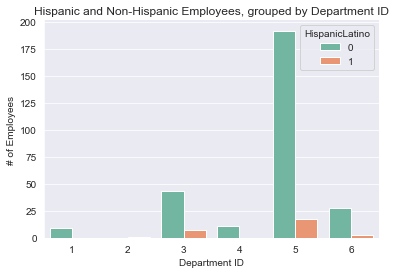

In [126]:
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.countplot(data=loc_df, x="DeptID", hue='HispanicLatino')
plt.title('Hispanic and Non-Hispanic Employees, grouped by Department ID')
plt.xlabel('Department ID')
plt.ylabel('# of Employees')
sns.despine()
plt.show()


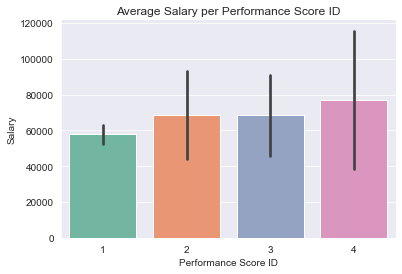

In [118]:
#I used these websites as a reference https://infopython.com/how-to-plot-a-bar-chart-using-python/ and https://datagy.io/seaborn-barplot/

sns.set_style("darkgrid")
sns.set_palette('Set2')
ax = sns.barplot(x='PerfScoreID', y = 'Salary', data=loc_df, ci='sd')

plt.title('Average Salary per Performance Score ID')
plt.xlabel('Performance Score ID')
plt.ylabel('Salary')

sns.despine()

plt.show()


***

Given the large number of categories in the dataset, I parred it down to the columns I thought would be most benefical to look at. After playing with other charts, something like a heatmap or pairplot wouldn't be as great with this dataset. I decided to use 2 barcharts to visualize the data. First I wanted to see a breakdown of Hispanic and Non-Hispanic employees by each department. We can see that Hispanic employees are most concentrated in Production department. Next I wanted to see the average Salaries across the Performance Scores. I also wanted to include the standard deviation. As expected, the highest performances get paid the most. Though the largest deviation resides in that category. Interestingly, Fully Meets and Needs Improvement (3 and 2 respectively) is nearly identical in average pay and standard deviation. 

***

## 5. Run one model

The only requirement is that you use `sklearn` to run either a regression or classification (logistic regression) model. The only required output are the coefficients, but if you output some metrics, that's even better. 

In [51]:
#Run one model: it can be regression or classification, up to you! If you do both, you'll impress us. For the model,
#outputting the coefficients alone is sufficient, but think about what else you can do 
#    (hint: performance metrics? R-squared and RMSE, e.g.). You can do a train/test split, but it's not required


x = loc_df.drop(axis=1, columns='Salary')
y = loc_df['Salary']

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2, random_state=42)

print("X train = ", X_train.shape)
print("y train = ", y_train.shape)
print("\nX test = ", X_test.shape)
print("y test = ", y_test.shape)

X train =  (248, 17)
y train =  (248,)

X test =  (63, 17)
y test =  (63,)


In [52]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

***
After reviewing the data during the EDA, Salary seemed like the most interesting output. Most of the HR dataset are demographic data in someway or form and I'm curious to see how it contributes to overall salary compensation. 
***

In [54]:
# Calculate the r-squared metric for the regression
score = lr_model.score(X_test, y_test)

# Print output
print('\nR-square = ', f'{score:.3f}')
print('Feature coefficients (aka slopes): \n')
for feature, coef in zip(X_train.columns, lr_model.coef_):
    print(feature, ':', f'{coef:.2f}')


R-square =  0.388
Feature coefficients (aka slopes): 

MaritalStatusID : -331.60
GenderID : 908.86
EmpStatusID : -111.07
DeptID : -3778.79
PerfScoreID : 4879.76
FromDiversityJobFairID : 799.98
Termd : -7975.34
PositionID : -117.68
HispanicLatino : 5287.88
EngagementSurvey : 2697.01
EmpSatisfaction : 663.29
SpecialProjectsCount : 3329.49
DaysLateLast30 : 2846.26
Absences : 471.91
RecruitmentSourceID : -1188.60
TimeLastPerformanceReview : 3.60
EmployeeAge : -52.18


****


Our R-squared value is low, which means our regression doesn't seem to track with the dataset very well. Taking a look at the coefficients somethings jump out. It appears that PerfScoreID, EngagementSurvey, and SpecialProjectsCount all seem to positively affect Salary (as expected) but also whether the employee is Hispanic as well. Absences also positively affects Salary, but based on our analysis previously, we saw that many employees were retained even with large amounts of absences. As expected, Termd had the largest negative effect on Salary. 


****

In [55]:
y_predicted = lr_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("RMSE = ", f'{rmse:.2f}')

RMSE =  22260.54


***

Much like how we saw our R-squared value indicated our model didn't fit our data well, we can see that our root mean squared error is also extremely high, which also indicates a poor model. 


****

In [79]:
loc_df = df3.loc[ : , col]
x = loc_df.drop(axis=1, columns='HispanicLatino')
y = loc_df['HispanicLatino']

*****

Since being Hispanic seemed to have a large impact on salary, I decided to take a look at it with a logistic regression. 

****

In [89]:
# don't worry about the apply and lambda here, this is just to create a new column with the string SF or NYC
loc_df['Hispanic'] = loc_df['HispanicLatino'].apply(lambda x: 'YES' if x else 'NO')

loc_df.head()

,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,HispanicLatino,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,RecruitmentSourceID,TimeLastPerformanceReview,EmployeeAge,Hispanic
0,0,1,1,5,4,0,62506,0,19,0,4.60,5,0,0,1,1,1385.0,39.0,NO
1,1,1,5,3,3,0,104437,1,27,0,4.96,3,6,0,17,0,2443.0,47.0,NO
2,1,0,5,5,3,0,64955,1,20,0,3.02,3,0,0,3,1,3823.0,34.0,NO
3,1,0,1,5,3,0,64991,0,19,0,4.84,5,0,0,15,0,1399.0,34.0,NO
4,2,0,5,5,3,0,50825,1,19,0,5.00,4,0,0,2,2,2466.0,33.0,NO


In [87]:
log_reg = LogisticRegression(solver= 'liblinear', C=1000)
log_reg.fit(x[['Salary']], y)

LogisticRegression(C=1000, solver='liblinear')

In [88]:
log_reg.score(x[['Salary']], y) #accuracy 

0.909967845659164

***

Significantly more accurate than our linear regression. This logistic regression does isolate the Salary to HispanicID. 

***

In [138]:
input_salary = loc_df[['Salary']].values
#print(input_salary[0:10])

In [139]:
class_prediction = log_reg.predict(input_salary)
#class_prediction[0:10]

In [97]:
gender_mask = (loc_df['Hispanic'] == 'YES').values

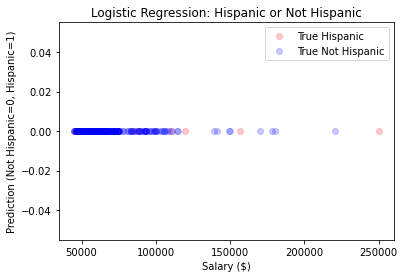

In [98]:
plt.plot(input_salary[gender_mask], class_prediction[gender_mask], 'ro', label='True Hispanic', alpha=0.2)
plt.plot(input_salary[~gender_mask], class_prediction[~gender_mask], 'bo', label='True Not Hispanic', alpha=0.2)

plt.xlabel('Salary ($)')
plt.ylabel('Prediction (Not Hispanic=0, Hispanic=1)')
plt.title('Logistic Regression: Hispanic or Not Hispanic')
plt.legend();

***

I referred to this article for advice on this plot. https://stackoverflow.com/questions/56133612/why-is-my-logistic-regression-model-predicting-0s-only-small-sample-size

It appears that my logistic regression is only predicting 0 rather than 0 or 1. There are a few possible reasons for this but I believe is it a product of having a small sample size and is likely skewed.  


***

In [136]:
prob_prediction = log_reg.predict_proba(input_salary)[:, 1]

#prob_prediction

Text(0.5, 1.0, 'Logistic Regression: Hispanic or Not Hispanic')

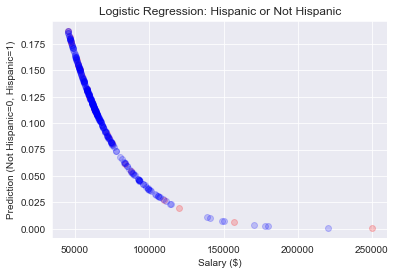

In [137]:
plt.plot(input_salary[gender_mask], prob_prediction[gender_mask], 'ro', label='True Hispanic',alpha=0.2)
plt.plot(input_salary[~gender_mask], prob_prediction[~gender_mask], 'bo', label='True Not Hispanic',alpha=0.2)

plt.xlabel('Salary ($)')
plt.ylabel('Prediction (Not Hispanic=0, Hispanic=1)')
plt.title('Logistic Regression: Hispanic or Not Hispanic')

***

The predict_proba function confirms what we thought about the logistic regression earlier. The model is skewed heavily towards 0 and as a result, the function will predict 0 nearly everytime. 

****

**REMEMBER: Doing only the minimum of what's required will get you a grade of approx B/B+, depending on what others do. The midterm and final are graded on a curve, by necessity (Booth rules about having a maximum GPA for each course every quarter).**